In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 15 and 16

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:6}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meakh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\meakh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "baguette food",
    "banana bread food",
    "bread food",
    "data science",
    "sports analytics",
    "football sport",
    "ice hockey",
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17
6,ice hockey,It belongs to a family of sports called hockey.,10


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

3

food : "baguette food", "banana bread food" and "bread food"

Science areas : "data science" and "sports analytics" 

sport : "football sport" and"ice hockey"

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
count_X = vec.fit_transform(wiki_df["text"])
bow_df = pd.DataFrame(
    count_X.toarray(), columns=vec.get_feature_names_out(), index=wiki_df["text"]
)
bow_df

,1986,2011,ability,also,an,analytics,and,application,are,around,...,term,the,throughout,to,underlying,use,was,world,year,yeast
text,,,,,,,,,,,,,,,,,,,,,
"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",1,0,0,0,0,0,3,0,0,0,...,0,6,0,1,0,0,1,0,1,0
It is often a moist and sweet quick bread but some recipes are yeast raised.,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",0,0,0,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0
"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",0,1,0,0,0,1,0,0,0,0,...,1,3,0,0,0,0,1,0,0,0
"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
It belongs to a family of sports called hockey.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(count_X)
kmeans_bag_pred = kmeans.labels_
kmeans_bag_pred

array([2, 0, 0, 0, 1, 0, 0])

In [7]:
wiki_df["bow_kmeans"] = kmeans_bag_pred

wiki_df

,wiki query,text,n_words,bow_kmeans
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0
6,ice hockey,It belongs to a family of sports called hockey.,10,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [8]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

# If this cell gives an error, try updating transformers with
# pip install transformers -U

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\meakh\.cache\huggingface\hub\models--sentence-transformers--paraphrase-distilroberta-base-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sents_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sents_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.000694,0.295713,0.101010,-0.036998,-0.143787,0.150098,0.047675,-0.037660,-0.012557,-0.135149,...,0.209796,0.066315,0.192004,-0.208439,-0.174074,0.048892,-0.494626,0.100555,0.081854,-0.125856
1,-0.202058,0.320748,0.190347,0.232200,0.600541,0.376622,-0.018205,-0.027148,-0.076680,0.381883,...,0.213061,-0.080009,0.422756,0.072725,0.016024,-0.014596,-0.202858,-0.162947,-0.190418,-0.002013
2,-0.022418,0.217159,0.022694,0.003616,0.240856,0.358046,-0.053310,-0.328075,0.190012,0.244470,...,0.265413,-0.415594,0.003036,0.052484,0.345947,0.110091,0.405441,0.197791,-0.058254,0.212376
3,0.270839,0.187923,-0.010779,0.318688,-0.092012,-0.204805,0.038100,-0.117648,0.084057,-0.170613,...,0.069943,-0.222988,0.092472,0.309445,0.289248,0.021022,-0.032693,-0.624040,0.358924,-0.034092
4,-0.101732,-0.185133,-0.107289,0.148191,0.458463,-0.555427,-0.073999,0.001754,-0.172459,-0.072560,...,0.428589,-0.340837,-0.159757,0.388600,0.316263,0.090864,-0.162353,-0.225393,0.417017,-0.179008
5,0.124750,0.327760,0.287334,-0.108246,0.024023,-0.123068,0.256753,-0.186897,0.207024,0.225442,...,0.476354,-0.425227,0.153235,0.176922,0.036421,0.104009,-0.137497,0.265884,0.431444,0.173653
6,0.108901,0.087363,0.119847,-0.050133,0.240210,-0.082101,0.190988,0.436203,-0.085557,-0.012788,...,0.145414,0.160033,0.071930,0.147640,0.043789,0.253031,-0.009358,0.415206,0.142142,0.130365


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [10]:
kmeans_embedded = KMeans(n_clusters=3, random_state=42)
kmeans_embedded.fit(emb_sents)

KMeans(n_clusters=3, random_state=42)

In [11]:
kmeans_embedded_pred = kmeans_embedded.labels_
kmeans_embedded_pred

array([2, 2, 0, 1, 1, 1, 1])

In [12]:
wiki_df["emb_kmeans"] = kmeans_embedded_pred
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2,2
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0,1
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0,1
6,ice hockey,It belongs to a family of sports called hockey.,10,0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [13]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.75, min_samples=3, metric='cosine')
dbs.fit(emb_sents)

DBSCAN(eps=0.75, metric='cosine', min_samples=3)

In [14]:
db_emb_pred = dbs.labels_
db_emb_pred

array([-1, -1, -1,  0,  0,  0,  0], dtype=int64)

In [15]:
wiki_df["emb_dbscan"] = db_emb_pred
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2,2,-1
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0,2,-1
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0,-1
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0,1,0
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1,0
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0,1,0
6,ice hockey,It belongs to a family of sports called hockey.,10,0,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

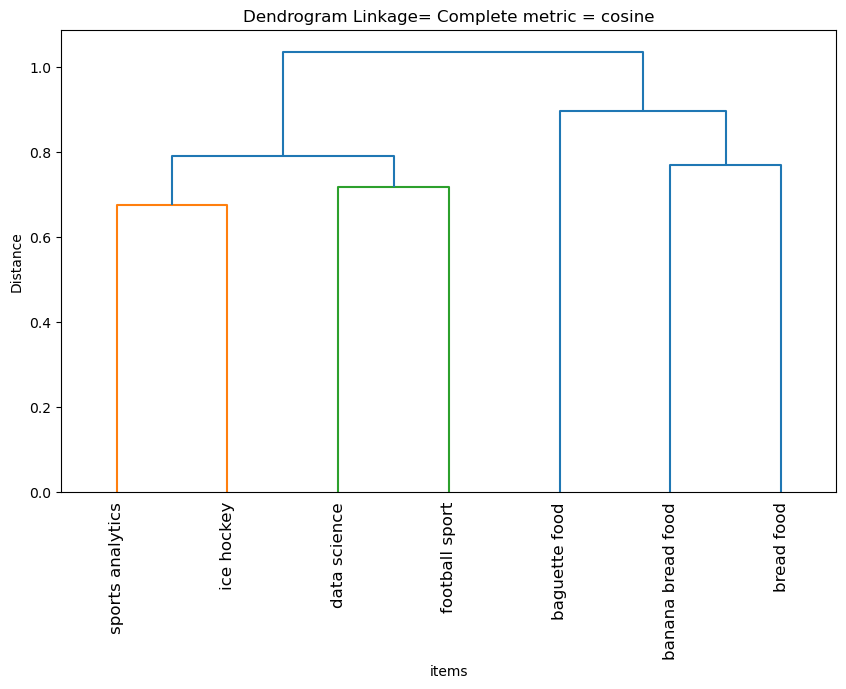

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linkage_matrix = linkage(emb_sents, method='complete', metric='cosine')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=wiki_df['wiki query'].values, leaf_rotation=90)
plt.title('Dendrogram Linkage= Complete metric = cosine')
plt.xlabel('items')
plt.ylabel('Distance')
plt.show()

In [17]:
hierarchy_emb_pred = fcluster(linkage_matrix, 3,  criterion='maxclust')
hierarchy_emb_pred

array([3, 2, 2, 1, 1, 1, 1], dtype=int32)

In [18]:
wiki_df["emb_hierarchical"] = hierarchy_emb_pred
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,baguette food,"In 1986, it was established as a subsidiary of Shani Co., Ltd., and opened the first 'Paris Baguette' in Gwanghwamun, Seoul, and the first high-end bakery 'Paris Croissant' in Itaewon the following year, and the corporate name changed to the same as the brand name.",54,2,2,-1,3
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,0,2,-1,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0,-1,2
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,0,1,0,1
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1,0,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,0,1,0,1
6,ice hockey,It belongs to a family of sports called hockey.,10,0,1,0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

1. bag of words did not perform well. it clustered ice hockey, football sport, data science, bread food, and banana bread food all together, and put the rest in two seperate groups, so very inaccurate. I expected bag of words to perform bad because it does not provide context for each word, therfore it will be more likely to make mistakes.


2. Sentence embedding did not do well either,however it did group baguette food and banana bread food together. It also put data science, sport analytics, ice hockey and football sport together, and it put bread food in a seperate category completely. I assumed that this mode would do the best because of the contextual data it provides, however it miscategorized bread food , and could not seperate the science category from the sport category.

3. DB scan only created 2 catgories, eventhough I specified three, but it was able to cpature all the foods in the same category and put the rest in a different a ctegory. I expected the model to work similar to the sentence embedding method, because the only thing that changed is the way we calculate the distance, but it performed better than the embedding as it distinguished perfectly between food and non-food, but it o nly created 2 clusters, despite me trying to tune it.

4. Hierchical clustering performed similar to DB and seperated the foods form non foods, but it put baguette food in a seperate category. This model performed similar to the sentence embedding method as well as it distinguished between food and non food, but it put baguette food in a third category.


The clustering results did not align with my expectations, as I thought the models would perform better, however, I think it is interesting how 2,3 and 4 were able to differentiate between food and non-food to some extent, except for the bag of words, that performed terribly, maybe because of the lack of embedding and context.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [19]:
import umap

In [20]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


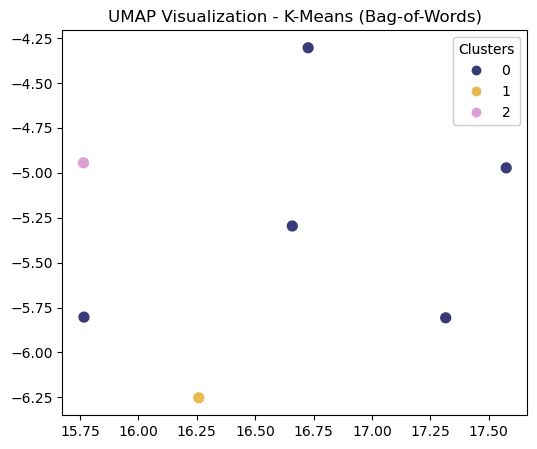

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


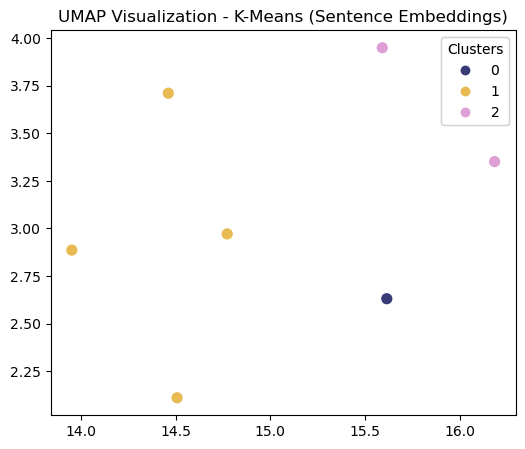

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


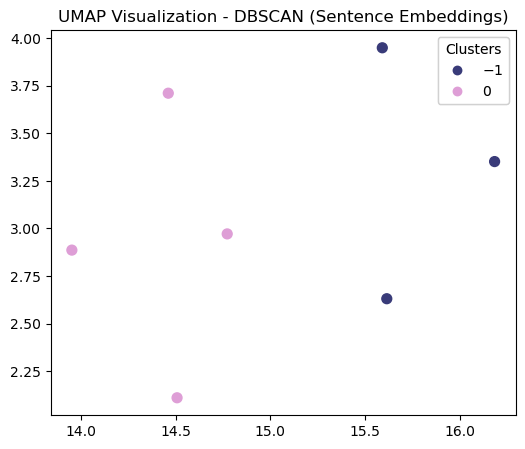

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


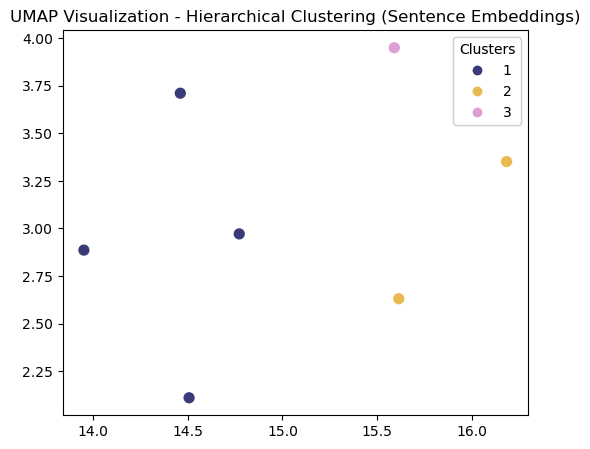

In [21]:
# k-means means with BOW
plot_umap_clusters(
    data=count_X.toarray(), 
    cluster_labels=kmeans_bag_pred,
    raw_sents=wiki_df["text"],
    title="UMAP Visualization - K-Means (Bag-of-Words)")

# k-means with Embedding
plot_umap_clusters(
    data=emb_sents, 
    cluster_labels=kmeans_embedded_pred,
    raw_sents=wiki_df["text"],
    title="UMAP Visualization - K-Means (Sentence Embeddings)")

# DB
plot_umap_clusters(
    data=emb_sents, 
    cluster_labels=db_emb_pred,
    raw_sents=wiki_df["text"],
    title="UMAP Visualization - DBSCAN (Sentence Embeddings)")

# hierarchical clustering
plot_umap_clusters(
    data=emb_sents, 
    cluster_labels=hierarchy_emb_pred,
    raw_sents=wiki_df["text"],
    title="UMAP Visualization - Hierarchical Clustering (Sentence Embeddings)")

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [22]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [23]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [24]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [25]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [26]:
shortest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmin(), 'name']
print(shortest_recipe)

bread


In [27]:
longest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmax(), 'name']
print(longest_recipe)

baked tomatoes with a parmesan cheese crust and balsamic drizzle


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

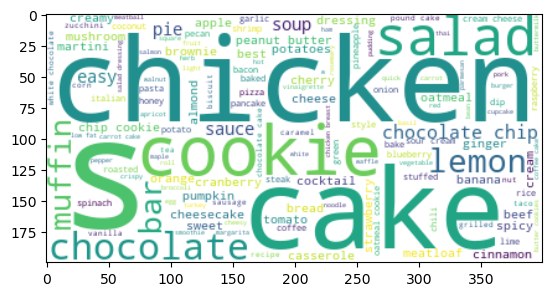

In [28]:
from wordcloud import WordCloud

recipe_names = " ".join(recipes_df["name"].values)
wc = WordCloud(background_color='white').generate(recipe_names)


plt.imshow(wc, interpolation='bilinear')


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [29]:
from sentence_transformers import SentenceTransformer

recipe_names = recipes_df["name"].tolist()
recipe_embeddings = embedder.encode(recipe_names)

recipe_emb_df = pd.DataFrame(recipe_embeddings,index=recipes_df.index )
recipe_emb_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
42,-0.333474,0.227865,-0.307339,0.410549,0.917103,-0.345506,0.305810,0.256676,-0.147712,0.040727,...,-0.053025,-0.209463,0.362418,-0.246085,0.208379,-0.024874,0.506561,0.197738,-0.386421,-0.002184
101,-0.024523,0.246223,-0.055708,0.358273,0.454786,-0.088054,0.260368,0.231947,0.093013,-0.007835,...,0.144860,-0.435459,0.208344,-0.002655,-0.081200,-0.130489,0.452378,0.186310,-0.278500,0.028580
129,-0.026562,0.194671,0.038102,-0.099181,0.653784,-0.230868,0.064517,0.001376,-0.061280,0.232094,...,0.169605,0.239354,0.392649,0.271398,-0.093971,0.060101,-0.281418,0.133211,-0.122345,-0.109863
138,-0.168002,-0.219218,0.330761,0.302196,-0.173169,0.204557,0.192390,0.140975,0.303174,0.038063,...,0.019094,-0.002448,0.437833,0.563785,0.033442,0.187658,0.529252,-0.233786,0.509931,0.410715
163,0.061076,-0.333798,0.242905,0.395977,-0.466468,0.496505,-0.136754,0.122097,0.114248,0.065317,...,0.044438,-0.213657,0.410353,-0.233599,-0.224422,0.094330,0.173351,0.105781,-0.114749,-0.150677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231430,-0.009714,0.200162,0.018329,0.237816,0.748988,0.121919,0.087918,0.216755,-0.291041,0.074165,...,-0.120459,0.162877,0.480064,0.235902,0.146278,0.252980,-0.063639,-0.066044,-0.133067,-0.034040
231514,-0.106532,-0.034574,0.160070,0.258504,0.882480,0.091899,0.008815,0.372013,-0.266542,0.085018,...,0.063240,-0.099132,0.332694,0.031869,0.582796,0.216874,0.241107,0.091758,-0.261551,-0.082310
231547,0.016149,-0.053035,-0.035097,-0.021835,0.735161,0.245519,-0.151837,0.003954,0.102566,0.001363,...,0.102296,0.023821,0.602685,-0.067070,0.177535,0.253982,0.242439,-0.436000,-0.053910,0.012423
231596,0.026659,0.202483,0.344633,-0.138708,0.514424,0.630948,-0.003165,-0.102897,-0.434900,-0.192056,...,-0.162457,0.130696,0.113645,0.186650,-0.155393,0.130507,1.146238,-0.240861,0.236830,0.177123


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [30]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

The yellowbrick model demonstrates that the best balance between fit time and distortion score is at cluster = 7; however, since there is no elbow.

From Silhouette , Larger K's (15) and lower K's(5) cause the mdel to perform worse, and bring the average Silhouette score down. However ,  model preforms better when a moderate K is chosen (10 and 7), as the average silhouette coefficient values are higher.

I will choose k= 10 because there it has higher average score compared to k = 7.

In [31]:
...

Ellipsis

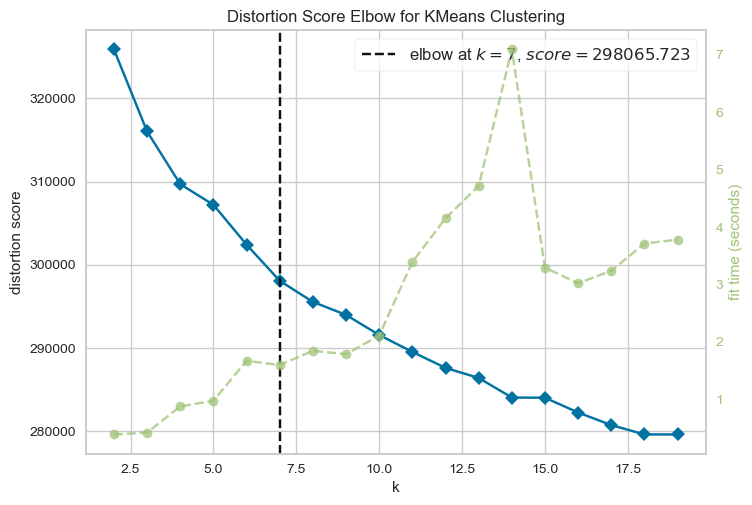

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(2,20)
)
visualizer.fit(recipe_embeddings)
visualizer.show()

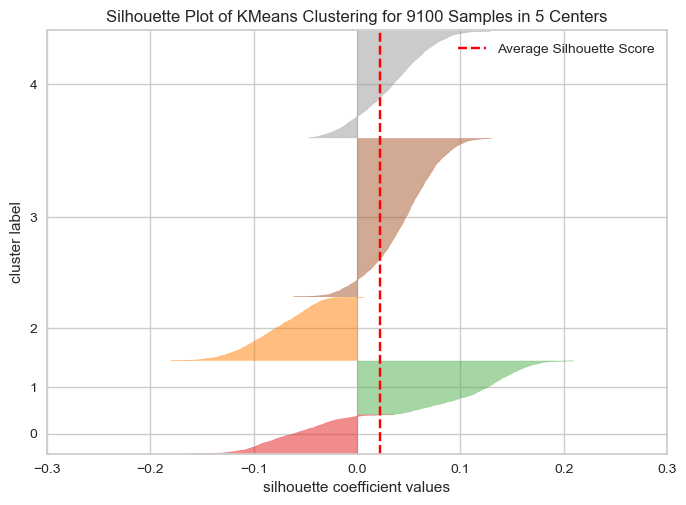

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
visualizer = SilhouetteVisualizer(
    KMeans(5, random_state=42)
)
visualizer.fit(recipe_embeddings)
visualizer.show()

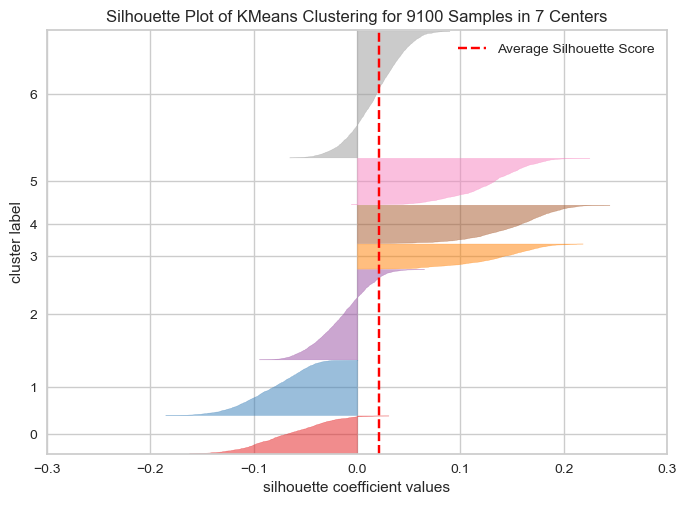

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
visualizer = SilhouetteVisualizer(
    KMeans(7, random_state=42)
)
visualizer.fit(recipe_embeddings)
visualizer.show()

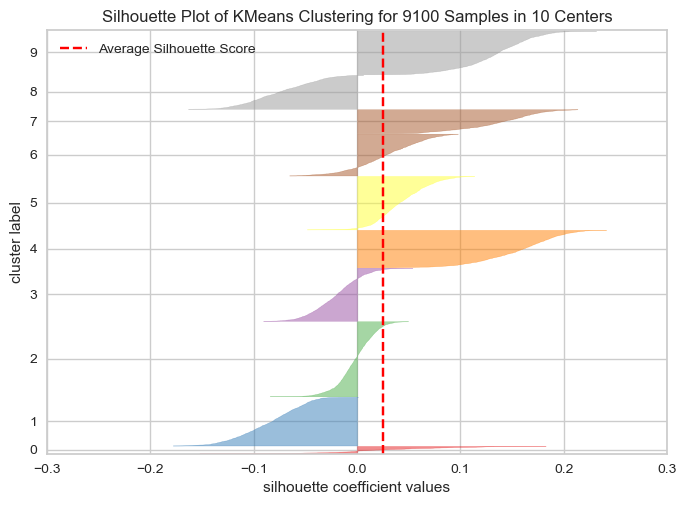

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
visualizer = SilhouetteVisualizer(
    KMeans(10, random_state=42)
)
visualizer.fit(recipe_embeddings)
visualizer.show()

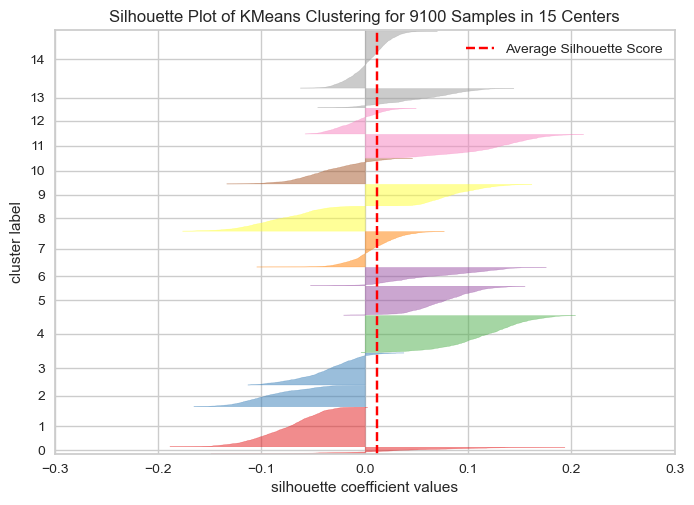

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
visualizer = SilhouetteVisualizer(
    KMeans(15, random_state=42)
)
visualizer.fit(recipe_embeddings)
visualizer.show()

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


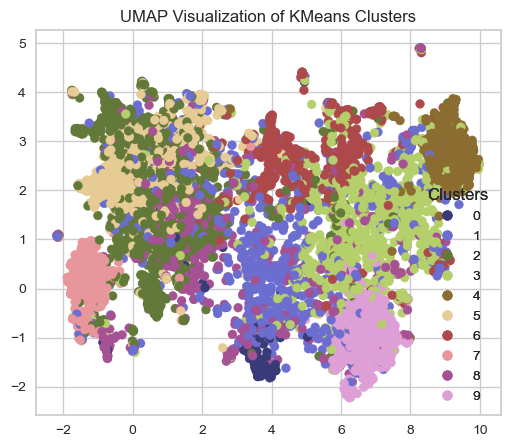

In [37]:
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(recipe_emb_df)

plot_umap_clusters(
    data=recipe_emb_df,
    cluster_labels=kmeans_labels,
    raw_sents=recipes_df["name"].tolist(),
    show_labels=False,
    size=40,
    n_neighbors=15,
    title="UMAP Visualization of KMeans Clusters"
)

In [38]:
recipes_df['best_kmeans'] = kmeans_labels

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

The results show that eps=0.5 and min_samples=5 provides the best clustering, silhouette score: 
0.1370 , which is the balance between available between cohesion and separation. With the same eps and min_samples=3 there is also a 0.1009 average score, which is quite close
Higher min samples result in lower number of clusters
Higher eps result in better score

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Param
eps_val = [0.3, 0.5]
min_samples_val = [2,3,5]

for eps in eps_val:
    for min_samples in min_samples_val:
        dbs = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = dbs.fit_predict(recipe_emb_df)
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # Calculate silhouette score
        if num_clusters > 1:
            score = silhouette_score(recipe_emb_df, labels, metric='cosine')
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} -> Silhouette Score: {score:.4f}, Clusters: {num_clusters}")


DBSCAN with eps=0.3, min_samples=2 -> Silhouette Score: -0.2618, Clusters: 248
DBSCAN with eps=0.3, min_samples=3 -> Silhouette Score: -0.2176, Clusters: 73
DBSCAN with eps=0.3, min_samples=5 -> Silhouette Score: -0.1277, Clusters: 18
DBSCAN with eps=0.5, min_samples=2 -> Silhouette Score: 0.0425, Clusters: 18
DBSCAN with eps=0.5, min_samples=3 -> Silhouette Score: 0.1009, Clusters: 4
DBSCAN with eps=0.5, min_samples=5 -> Silhouette Score: 0.1370, Clusters: 2


In [40]:

recipe_emb_df.columns = recipe_emb_df.columns.astype(str)
best_dbs = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
best_dbs_pred = best_dbs.fit_predict(recipe_emb_df)
recipes_df['best_dbs'] = best_dbs_pred


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

The dendrogram exhibits about 4 different main streams(as there is about 4 branches with high number of instances). The distribution of recipes is quite reasonable as we do not have clusters with very low numbers 

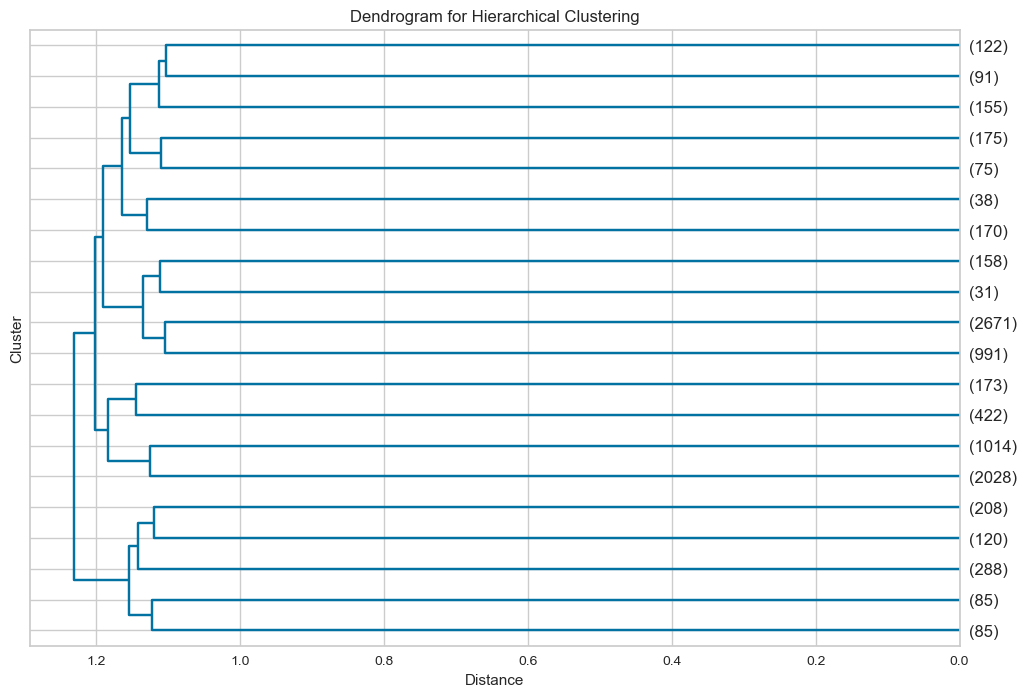

In [41]:
linkage_matrix = linkage(recipe_emb_df, method='complete', metric='cosine')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', orientation='left', p=20)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Distance")
plt.ylabel("Cluster")
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4, metric='cosine', linkage='complete')
hierarchical_labels = hierarchical.fit_predict(recipe_emb_df)
labels_series = pd.Series(hierarchical_labels)
counts = labels_series.value_counts()
print(counts)

3    3851
0    3637
2    826 
1    786 
Name: count, dtype: int64


In [43]:
recipes_df['hierarchical_labels'] = hierarchical_labels

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

Dbscan: 2-4 clusters

It seems that dbs is performing very poorly, as it only made two clusters, and one of the clusters is way more infrequent

In [44]:
recipes_df[['best_dbs']].head(20)

,best_dbs
42,0
101,0
129,0
138,-1
163,0
169,0
234,0
262,0
318,0
337,0


Hierarchical: 4

It seems that hierchical has labelled all the muffins, cookies, cakes, as one cluster which is desserts probably (3)

Cluster 2 seems to be salads, drinks, and bars all clustered together (mostly drinks), maybe the model confused edible bars with bars in which alcohol is served

Cluster 1 seems to be more drinks,  both alcoholic and not 

Cluster 0 seems to be dishes and soups



In [45]:
recipes_df[recipes_df['hierarchical_labels'] == 3].head(15)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,best_kmeans,best_dbs,hierarchical_labels
42,i yam what i yam muffins,93958,45,133174,2004-06-22,"['60-minutes-or-less', 'time-to-make', 'course', 'preparation', 'breads', 'muffins', 'quick-breads']","[171.8, 9.0, 28.0, 10.0, 8.0, 4.0, 8.0]",10,"['preheat oven to 375 degrees', 'spray muffin tin with non-stick cooking spray and set aside', 'place the raisins in a small bowl and pour the 1 / 4 cup boiling water over them', 'cover and set aside while preparing batter', 'combine the flours , cocoa , baking powder , cinnamon , cloves , baking soda , and salt', 'lightly beat eggs with sorghum , oil , mashed yams and orange juice', 'add the egg mixture and buttermilk alternately to the dry ingredients , stir until well blended', 'drain the raisins and add to batter along with orange peel', 'spoon batter into prepared muffin tins , sprinkle 1 / 4 to 1 / 2 tsp of granulated sugar over each muffin', 'bake in preheated oven for 15 to 20 minutes']","these muffins may have slightly different ingredients but the end result is a wonderful rich, moist muffin. the sugar sprinkled on top before cooking gives a slightly sweet crunch and cracked glazed appearance.","['all-purpose flour', 'buckwheat flour', 'unsweetened cocoa', 'baking powder', 'baking soda', 'salt', 'ground cinnamon', 'ground cloves', 'sorghum', 'eggs', 'yam', 'low-fat buttermilk', 'orange rind', 'orange juice', 'canola oil', 'raisins', 'boiling water', 'granulated sugar']",18,6,0,3
101,to your health muffins,61973,40,33823,2003-05-12,"['60-minutes-or-less', 'time-to-make', 'course', 'preparation', 'breads', 'muffins', 'quick-breads']","[159.0, 8.0, 58.0, 10.0, 7.0, 4.0, 8.0]",5,"['blend together in large bowl flour , bran , brown sugar , baking soda , salt , cinnamon , carrots and raisins', 'in second bowl , beat buttermilk , oil , egg and vanilla', 'add liquid ingredients to dry ingredients and mix just until moistened', 'spoon into 12 greased or paper-lined muffin cups', 'bake at 375f for 20 minutes']","these muffins sound like they are very healthy for you, and pretty easy to make. another one of my great finds. to your health. enjoy","['whole wheat flour', 'natural bran', 'brown sugar', 'baking soda', 'salt', 'cinnamon', 'carrot', 'raisins', 'buttermilk', 'corn oil', 'egg', 'vanilla']",12,6,0,3
129,250 00 chocolate chip cookies,118843,20,145599,2005-04-24,"['30-minutes-or-less', 'time-to-make', 'course', 'preparation', 'drop-cookies', 'desserts', 'easy', 'cookies-and-brownies', '3-steps-or-less']","[5286.9, 427.0, 1630.0, 159.0, 163.0, 656.0, 224.0]",3,"['mix all ingredients together just until blended', 'spoon large tbspfuls onto a baking sheet', 'bake at 350 for 10-14 minutes']",these are great! the perfect name for them!,"['butter', 'white sugar', 'brown sugar', 'eggs', 'vanilla', 'flour', 'oatmeal', 'salt', 'baking powder', 'baking soda', 'chocolate chips', ""hershey's semi-sweet baking chocolate"", 'nuts']",13,4,0,3
234,ma s oatmeal cake and icing,261215,45,568297,2007-10-25,"['60-minutes-or-less', 'time-to-make', 'course', 'preparation', 'desserts', 'cakes']","[366.5, 29.0, 120.0, 16.0, 8.0, 30.0, 15.0]",7,"['in a small bowl combine quick oats , margarine , and boiling water', 'cover and allow margarine to melt , and mixture to cool a bit', 'mix remaining cake ingredients and mix well', 'spread into 9x13 greased and lightly floured cake pan', 'bake at 350f for approximately 35 minutes or until done', 'for icing: mix icing ingredients until well blended', 'spread over cooled cake and put under broiler until coconut browns']","this recipe is a very old family recipe that came from my great grandmother who passed in 1988 at the age of 87. this a very heavy, moist cake. hope you enjoy it as much as our family has for many years.","['boiling water', 'quick oats', 'margarine', 'brown sugar', 'flour', 'eggs', 'salt', 'cinnamon', 'nutmeg', 'baking soda', 'shredded coconu

In [46]:
recipes_df = recipes_df[['name', 'hierarchical_labels', 'best_dbs', 'best_kmeans']]
pd.set_option('display.max_rows', 200)



recipes_df[recipes_df['hierarchical_labels'] == 2].head(15)


,name,hierarchical_labels,best_dbs,best_kmeans
138,lplermagronen,2,-1,8
436,kelly s chinese cabbage salad,2,0,7
535,starbucks oat fudge bars,2,0,1
614,nilla wafer martini,2,0,0
1129,2000 flushes,2,-1,1
1530,5 cup ambrosia,2,-1,8
1626,5 c s crescents,2,-1,8
1676,57 t bird with hawaiian plates,2,-1,5
1852,a berry lime martini,2,0,0
2281,absolut trouble,2,-1,1


In [47]:
recipes_df[recipes_df['hierarchical_labels'] == 1].head(15)

,name,hierarchical_labels,best_dbs,best_kmeans
456,marco polenta,1,-1,8
589,57 chevy,1,-1,1
735,007 cocktail,1,0,1
1141,220 btu,1,-1,1
1621,5 0 cosmo,1,0,1
1760,7 layer elote dip,1,0,1
1811,8th birthday,1,-1,1
1885,a day at the beach,1,0,1
2248,abehjerne monkey brains,1,-1,1
2274,abs diet ultimate power smoothie,1,0,3


In [48]:
recipes_df[recipes_df['hierarchical_labels'] == 0].head(15)

,name,hierarchical_labels,best_dbs,best_kmeans
163,california roll salad,0,0,7
169,chef salad dressing,0,0,7
399,green soup,0,0,2
418,i coulda had a stuffed pepper stuffed peppers,0,0,2
465,mom s chicken,0,0,5
493,orange soup,0,0,2
514,ritz y chicken,0,0,5
683,spicy pasta fagioli,0,0,2
709,spaghetti squares,0,0,2
849,10 minute baked halibut with garlic butter sauce,0,0,5


kmeans: 10  clusters

0: includes motly alcholic drinks
1: seems to be a mix of alchoholic drinks and dips, batters, and bars
2: appetizers (potato, soup)
3: cheesecakes, brownie, coffee
4: cookies
5:dishes
6:bread,muffins, biscuits
7:salad
8:alchocholic drinks
9:cake



In [49]:
recipes_df[recipes_df['best_kmeans'] == 0].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
614,nilla wafer martini,2,0,0
1852,a berry lime martini,2,0,0
7103,apple pie martini,2,0,0
7390,apple thyme martini,2,0,0
7915,appletini,2,0,0
8320,apricot mango martini,2,0,0
8434,arclight cinemas martini,2,0,0
9377,asian pear martini,2,0,0
10445,aunt nan s french dressing,1,0,0
16460,banana crantini,2,0,0


In [50]:
recipes_df[recipes_df['best_kmeans'] == 1].head(15)

,name,hierarchical_labels,best_dbs,best_kmeans
535,starbucks oat fudge bars,2,0,1
554,the ultimate brownie,3,0,1
589,57 chevy,1,-1,1
735,007 cocktail,1,0,1
995,17 twist,3,-1,1
1129,2000 flushes,2,-1,1
1141,220 btu,1,-1,1
1257,3 ingredient moroccan dry rub,3,-1,1
1621,5 0 cosmo,1,0,1
1760,7 layer elote dip,1,0,1


In [51]:
recipes_df[recipes_df['best_kmeans'] == 2].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
337,buffalo wing mushrooms,3,0,2
399,green soup,0,0,2
418,i coulda had a stuffed pepper stuffed peppers,0,0,2
493,orange soup,0,0,2
683,spicy pasta fagioli,0,0,2
709,spaghetti squares,0,0,2
971,15 minute taco in a pan,0,0,2
989,16 bean soup crockpot,0,0,2
1039,2 bean chili,0,0,2
1196,3 potato grill packet,0,0,2


In [52]:
recipes_df[recipes_df['best_kmeans'] == 3].head(20)

,name,hierarchical_labels,best_dbs,best_kmeans
262,real new york style cheesecake supreme,3,0,3
512,real strawberry pie with french cream topping,3,0,3
552,the heavy one cheesecake,3,0,3
1127,20 pound cheesecake,3,0,3
2097,a twist on rice krispie treats,0,0,3
2274,abs diet ultimate power smoothie,1,0,3
2573,adirondack applesauce and date bars,3,0,3
2616,adult cherry cola drink,1,0,3
2617,adult chocolate milk,3,0,3
2924,aimbrulee s ultimate pumpkin cheesecake,3,0,3


In [53]:
recipes_df[recipes_df['best_kmeans'] == 4].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
129,250 00 chocolate chip cookies,3,0,4
449,lofthouse sugar cookies,3,0,4
1118,20 minute applesauce cookies,3,0,4
1964,a honey of an oatmeal cookies,3,0,4
2291,absolute best most excellent soft oatmeal raisin cookies,3,0,4
2948,airbake giant cashew white chocolate cookies,3,0,4
3246,alice medrich s peanut butter cookies,3,0,4
3334,all grown up chewy chocolate chip cookies,3,0,4
3556,almond bar cookies,3,0,4
3570,almond blueberry cookies,3,0,4


In [54]:
recipes_df[recipes_df['best_kmeans'] == 5].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
465,mom s chicken,0,0,5
514,ritz y chicken,0,0,5
849,10 minute baked halibut with garlic butter sauce,0,0,5
876,100 parmesan chicken,0,0,5
1023,1950 s meatloaf,0,0,5
1389,30 minute garlic almond chicken under a brick,0,0,5
1615,5 star oven fried chicken,0,0,5
1676,57 t bird with hawaiian plates,2,-1,5
2085,a taste of africa kenyan chicken curry,0,0,5
3076,albacore tuna with jalapeno bacon cream sauce,0,0,5


In [55]:
recipes_df[recipes_df['best_kmeans'] == 6].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
42,i yam what i yam muffins,3,0,6
101,to your health muffins,3,0,6
484,oh boy waffles,3,0,6
498,peanut butter jam sandwich muffins,3,0,6
741,1 lb abm hawaiian sweet bread,3,0,6
787,1 bowl fudgy brownies,3,0,6
875,100 honey whole wheat cracked wheat bread,3,0,6
882,100 whole grain wheat bread,3,0,6
1208,3 c bread,3,0,6
1407,365 day buttermilk cornbread,3,0,6


In [56]:
recipes_df[recipes_df['best_kmeans'] == 7].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
163,california roll salad,0,0,7
169,chef salad dressing,0,0,7
436,kelly s chinese cabbage salad,2,0,7
1006,1905 salad dressing recipe,0,0,7
1139,22 second salad,0,0,7
1444,4 ingredient tomato cucumber onion salad,0,0,7
1590,5 minute salad,0,0,7
1791,7th inning stretch layered potato salad,3,0,7
1913,a different seven layer salad,0,0,7
2006,a more healthy vegetable medley,0,0,7


In [57]:
recipes_df[recipes_df['best_kmeans'] == 8].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
138,lplermagronen,2,-1,8
456,marco polenta,1,-1,8
1530,5 cup ambrosia,2,-1,8
1626,5 c s crescents,2,-1,8
2405,acapulco mocha iced latte,3,0,8
2434,achiote marinade,2,0,8
2550,addictive green enchiladas,0,0,8
2572,adios amigos,2,0,8
2807,after dinner milky way cappuccino adult,2,0,8
2857,agave nectar margarita,2,0,8


In [58]:
recipes_df[recipes_df['best_kmeans'] == 9].head(10)

,name,hierarchical_labels,best_dbs,best_kmeans
234,ma s oatmeal cake and icing,3,0,9
318,aunt johnnie s pound cake,3,0,9
390,funny bones cake,3,0,9
492,oops there it is chocolate cake low fat,3,0,9
500,perfect chocolate cake mccall s cooking school,3,0,9
548,the cake,3,0,9
695,guaranteed 5 star banana cake,3,0,9
784,1 2 3 4 cake orange,3,0,9
998,1880 chocolate spice cake with icing,3,0,9
1011,1930 recipe for mincemeat cake,3,0,9


# Overall

kmeans has too many clusters, and cakes, and alcoholic drinks are seperated into multiple clusters. However, it nicely distinguishes cookies and dishes

Hierchical  performed better in my opinion, it distinguished between dishes and soups, desserts and alcoholic drinks quite well in the clusters, however it included bars(like almond bars) inside the alcohol drinks cluster which could be because the model confused the bar with the bar as in the physical place.

Dbscan performed terribly and made two clusters, and there is no clear relationship between the items within a cluster.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)